Search the NYT API - Article Search, for articles related to Restaurants & Food, and perform an analysis to find the most reviewed cuisines. Also, find the frequency of food-reviews as per year.

In [39]:
# Fetch data from NYT API using requests

# import requests
# import json 

# base_url = "https://api.nytimes.com/svc/search/v2/articlesearch.json"
# query = 'cuisine'
# key = 'd6a6c22e607c430bbc79428541bcb0ff'

# for i in range (0,100):
#     url = base_url+'?&q='+query+'&page='+str(i)+'&api-key='+key
#     r = requests.get(url)
#     data = r.json()
#     json.dump(data,open("cuisine_data_page"+str(i)+".json",'w'))

In [4]:
# Read JSON Data

import os
import os.path
import glob
import json
from dateutil.parser import parse

try:
    os.chdir('C:/Users/Dhaval/Python_Data/bhinde_dhaval_spring2017/') # making changes to cwd for local reference
except:
    pass

raw_data_snippet=[]
raw_data_lead=[]
article_count = {}

file_list = glob.glob("midterm\\data\\Question2\\restaurants\\*.json")


data = []
for js in file_list:
    with open(js) as f:
        for line in f:
            data.append(json.loads(line))

#Loop to process all the data and extract legible content from JSON files
    for j in range(len(data)):
        for k in range(len((data[j]['response']['docs']))):
            raw_snippet = (data[j]['response']['docs'][k]['snippet'])
            raw_lead = (data[j]['response']['docs'][k]['lead_paragraph'])
            raw_date = (data[j]['response']['docs'][k]['pub_date'])
            try:
                raw_data_lead.append(raw_lead.lower())
                raw_data_snippet.append(raw_snippet.lower())   
                dt = parse(raw_date)
                clean_mmyy=(dt.strftime('%Y'))
                if clean_mmyy not in article_count:
                    article_count[clean_mmyy] = 1
                else: article_count[clean_mmyy]+=1
            except:
                pass
            
print('Execution Complete!')    
    

Execution Complete!


In [5]:
# Data cleaning
import re
regex = re.compile("[^a-zA-Z\s.]")

snippet_clean = []
for x in raw_data_snippet:
    snippet_clean.append(regex.sub('', x))  # Regex to clean the corpus    

lead_clean = []
for x in raw_data_lead:
    lead_clean.append(regex.sub('', x))  # Regex to clean the corpus   

In [6]:
# Tokenize words using NLTK
import re
import nltk
reg = re.compile("[^a-zA-Z\s]")

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

stop_words = set(stopwords.words("english"))
fin_snippet = ''.join(snippet_clean)
fin_lead = ''.join(lead_clean)

tokens = nltk.word_tokenize(fin_snippet)
wnl = nltk.WordNetLemmatizer()
lem_snippet = [wnl.lemmatize(t) for t in tokens]

tokens2 = nltk.word_tokenize(fin_lead)
wnl = nltk.WordNetLemmatizer()
lem_lead = [wnl.lemmatize(t) for t in tokens2]

lem_snippet_clean=[]
for x in lem_snippet:
    lem_snippet_clean.append(reg.sub('', x))  # Regex to clean the corpus 

lem_snippet_clean2 = [x for x in lem_snippet_clean if x]
filtered_snippet = [w for w in lem_snippet_clean2 if not w in stop_words]

lem_lead_clean=[]
for x in lem_lead:
    lem_lead_clean.append(reg.sub('', x))  # Regex to clean the corpus 

lem_lead_clean2 = [x for x in lem_lead_clean if x]
filtered_lead = [w for w in lem_lead_clean2 if not w in stop_words]


In [7]:
# Remove stop words from the corpus and make a word dictionary

import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))
filtered_snippet = [w for w in lem_snippet_clean2 if not w in stop_words]

dict_food = {}

for x in filtered_lead:
    if x not in dict_food:
        dict_food[x] = 1
    else: dict_food[x]+=1


In [8]:
# Analyze the filtered data for various food cuisines

cuisine_file = open("midterm\\data\\Question2\\cuisine.txt").read()
cuisine_cat = cuisine_file.split('\n')

cuisine_dict_clean = {}
for x in dict_food:
    if x in cuisine_cat:
        cuisine_dict_clean[x] = dict_food.get(x)

v1 = [v[0] for v in sorted(cuisine_dict_clean.items(), key=lambda x:x[1],reverse=True)]
v2 = [v[1] for v in sorted(cuisine_dict_clean.items(), key=lambda x:x[1],reverse=True)]
    

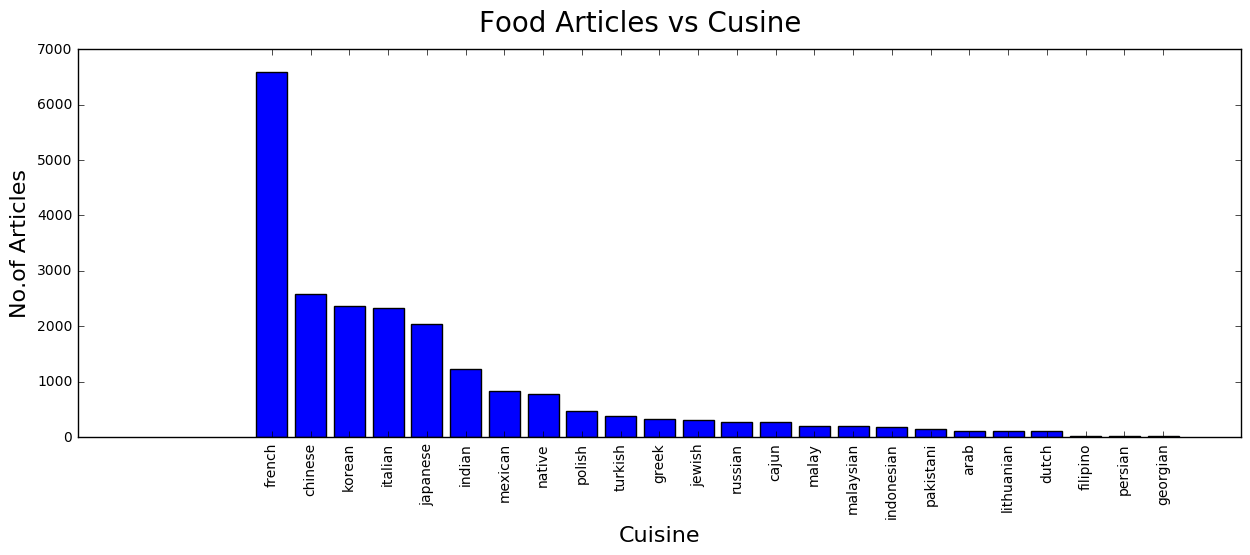

In [9]:
import matplotlib.pyplot as plt


from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

fig = plt.figure()
fig.suptitle('Food Articles vs Cusine', fontsize=20)
plt.xlabel('Cuisine', fontsize=16)
plt.ylabel('No.of Articles', fontsize=16)
plt.bar(range(len(v2)), v2, align='center')
plt.xticks(range(len(v1)), v1,rotation='vertical')

plt.show()

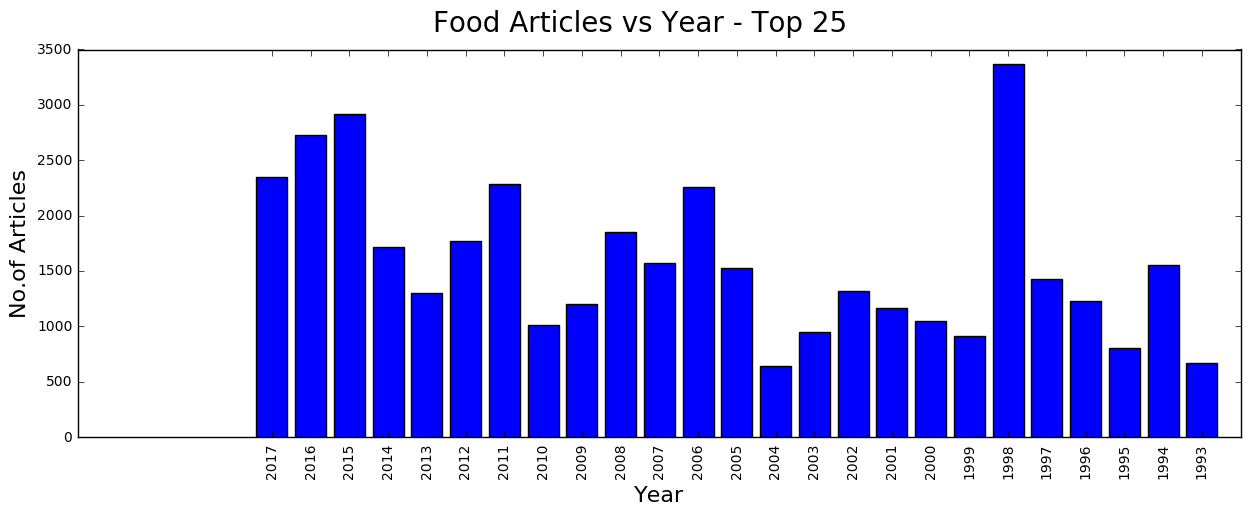

In [10]:
# Plot the number of food articles by year to analyze the market sentiment 

import matplotlib.pyplot as plt

v1 = [v[1] for v in sorted(article_count.items(), key=lambda x:x[0],reverse=True)[:25]]
v2 = [v[0] for v in sorted(article_count.items(), key=lambda x:x[0],reverse=True)[:25]]

from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

fig = plt.figure()
fig.suptitle('Food Articles vs Year - Top 25', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('No.of Articles', fontsize=16)
plt.bar(range(len(v1)), v1, align='center')
plt.xticks(range(len(v2)), v2,rotation='vertical')

plt.show()